In [5]:
# Get cal_clock, cal_fifo, cal_lru, cal_opt

import os

if not os.path.exists('cal_clock.py'):
    !wget https://github.com/minhthanh120/OS-theory/raw/master/cal_clock.py
if not os.path.exists('cal_fifo.py'):
    !wget https://github.com/minhthanh120/OS-theory/raw/master/cal_fifo.py
if not os.path.exists('cal_lru.py'):
    !wget https://github.com/minhthanh120/OS-theory/raw/master/cal_lru.py
if not os.path.exists('cal_opt.py'):
    !wget https://github.com/minhthanh120/OS-theory/raw/master/cal_opt.py


In [6]:
import cal_clock, cal_fifo, cal_lru, cal_opt
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


Tiền xử lý dữ liệu và tạo dữ liệu

In [7]:
data = pd.DataFrame(columns=["listpage","lenght", "frame", "opt", "lru", "fifo", "clock"])
data1 = pd.DataFrame(columns=["listpage","lenght", "frame", "opt", "lru", "fifo", "clock"])
data2 = pd.DataFrame(columns=["listpage","lenght", "frame", "opt", "lru", "fifo", "clock"])

time= pd.DataFrame(columns=["lenght", "frame", "opt", "lru", "fifo", "clock"])
time1= pd.DataFrame(columns=["lenght", "frame", "opt", "lru", "fifo", "clock"])
time2= pd.DataFrame(columns=["lenght", "frame", "opt", "lru", "fifo", "clock"])

Demo tính thời gian và page-fault

In [8]:
x=1000
capacity= 7
listpage = [np.random.randint(1, 10) for i in range(x)]
print('OPT:',cal_opt.opt(listpage, capacity))
print('LRU:',cal_lru.lru(listpage, capacity))
print('FIFO:',cal_fifo.fifo(listpage, capacity))
print('CLOCK:',cal_clock.clock(listpage, capacity))

OPT: (99, 0.0028727179999918917)
LRU: (223, 0.000626868000011882)
FIFO: (227, 0.00018408099998623584)
CLOCK: (206, 0.0004478129999938574)


tạo ra bộ dataframe từ random bộ số 1->9 với số frame = 4, 7, 10

In [9]:
for i in range(20, 1001):
    listpage = [np.random.randint(1, 10) for i in range(i)]
    p_opt, t_opt = cal_opt.opt(listpage, 4)
    p_lru, t_lru = cal_lru.lru(listpage, 4)
    p_fifo, t_fifo = cal_fifo.fifo(listpage, 4)
    p_clock, t_clock = cal_clock.clock(listpage, 4)
    data=data.append({'listpage':listpage,"lenght": len(listpage), 'frame': 4, 'opt':p_opt, 'lru': p_lru, 'fifo': p_fifo, 'clock': p_clock}, ignore_index= True)
    time= time.append({"lenght": len(listpage), "frame": 4, "opt": t_opt, "lru": t_lru, "fifo": t_fifo, "clock": t_clock}, ignore_index= True)
    
    p_opt, t_opt = cal_opt.opt(listpage, 7)
    p_lru, t_lru = cal_lru.lru(listpage, 7)
    p_fifo, t_fifo = cal_fifo.fifo(listpage, 7)
    p_clock, t_clock = cal_clock.clock(listpage, 7)
    data1=data1.append({'listpage':listpage,"lenght": len(listpage), 'frame': 7, 'opt':p_opt, 'lru': p_lru, 'fifo': p_fifo, 'clock': p_clock}, ignore_index= True)
    time1= time1.append({"lenght": len(listpage), "frame": 7, "opt": t_opt, "lru": t_lru, "fifo": t_fifo, "clock": t_clock}, ignore_index= True)

    p_opt, t_opt = cal_opt.opt(listpage, 10)
    p_lru, t_lru = cal_lru.lru(listpage, 10)
    p_fifo, t_fifo = cal_fifo.fifo(listpage, 10)
    p_clock, t_clock = cal_clock.clock(listpage, 10)
    time2= time2.append({"lenght": len(listpage), "frame": 10, "opt": t_opt, "lru": t_lru, "fifo": t_fifo, "clock": t_clock}, ignore_index= True)
    data2=data2.append({'listpage':listpage,"lenght": len(listpage), 'frame': 10, 'opt':p_opt, 'lru': p_lru, 'fifo': p_fifo, 'clock': p_clock}, ignore_index= True)



In [10]:
data #frame = 4

,listpage,lenght,frame,opt,lru,fifo,clock
0,"[7, 6, 6, 6, 2, 4, 4, 3, 2, 9, 3, 9, 3, 3, 3, ...",20,4,8,8,9,10
1,"[4, 3, 1, 9, 2, 3, 4, 6, 2, 6, 8, 5, 6, 3, 2, ...",21,4,9,12,12,12
2,"[2, 6, 7, 6, 5, 9, 2, 4, 9, 9, 8, 9, 1, 2, 9, ...",22,4,10,14,13,14
3,"[4, 2, 3, 4, 5, 1, 8, 8, 5, 1, 3, 7, 2, 4, 8, ...",23,4,11,15,13,14
4,"[9, 9, 3, 2, 9, 8, 6, 3, 3, 5, 1, 3, 4, 7, 1, ...",24,4,12,17,14,16
...,...,...,...,...,...,...,...
976,"[5, 1, 7, 1, 5, 9, 7, 8, 7, 9, 5, 1, 9, 9, 4, ...",996,4,323,550,529,559
977,"[9, 9, 8, 2, 2, 7, 3, 7, 5, 8, 7, 5, 6, 6, 9, ...",997,4,327,561,551,573
978,"[3, 8, 5, 4, 6, 4, 1, 1, 3, 4, 6, 6, 5, 3, 5, ...",998,4,343,563,562,564
979,"[8, 1, 7, 4, 8, 3, 9, 3, 8, 5, 2, 6, 9, 6, 2, ...",999,4,328,555,548,556


In [11]:
data1 #frame 7

,listpage,lenght,frame,opt,lru,fifo,clock
0,"[7, 6, 6, 6, 2, 4, 4, 3, 2, 9, 3, 9, 3, 3, 3, ...",20,7,8,8,8,8
1,"[4, 3, 1, 9, 2, 3, 4, 6, 2, 6, 8, 5, 6, 3, 2, ...",21,7,8,9,8,9
2,"[2, 6, 7, 6, 5, 9, 2, 4, 9, 9, 8, 9, 1, 2, 9, ...",22,7,8,9,9,9
3,"[4, 2, 3, 4, 5, 1, 8, 8, 5, 1, 3, 7, 2, 4, 8, ...",23,7,8,8,8,8
4,"[9, 9, 3, 2, 9, 8, 6, 3, 3, 5, 1, 3, 4, 7, 1, ...",24,7,9,11,12,10
...,...,...,...,...,...,...,...
976,"[5, 1, 7, 1, 5, 9, 7, 8, 7, 9, 5, 1, 9, 9, 4, ...",996,7,97,209,221,231
977,"[9, 9, 8, 2, 2, 7, 3, 7, 5, 8, 7, 5, 6, 6, 9, ...",997,7,96,209,211,215
978,"[3, 8, 5, 4, 6, 4, 1, 1, 3, 4, 6, 6, 5, 3, 5, ...",998,7,96,231,255,243
979,"[8, 1, 7, 4, 8, 3, 9, 3, 8, 5, 2, 6, 9, 6, 2, ...",999,7,97,227,224,215


In [12]:
data2 #frame 10

,listpage,lenght,frame,opt,lru,fifo,clock
0,"[7, 6, 6, 6, 2, 4, 4, 3, 2, 9, 3, 9, 3, 3, 3, ...",20,10,8,8,8,8
1,"[4, 3, 1, 9, 2, 3, 4, 6, 2, 6, 8, 5, 6, 3, 2, ...",21,10,8,8,8,8
2,"[2, 6, 7, 6, 5, 9, 2, 4, 9, 9, 8, 9, 1, 2, 9, ...",22,10,8,8,8,8
3,"[4, 2, 3, 4, 5, 1, 8, 8, 5, 1, 3, 7, 2, 4, 8, ...",23,10,8,8,8,8
4,"[9, 9, 3, 2, 9, 8, 6, 3, 3, 5, 1, 3, 4, 7, 1, ...",24,10,9,9,9,9
...,...,...,...,...,...,...,...
976,"[5, 1, 7, 1, 5, 9, 7, 8, 7, 9, 5, 1, 9, 9, 4, ...",996,10,9,9,9,9
977,"[9, 9, 8, 2, 2, 7, 3, 7, 5, 8, 7, 5, 6, 6, 9, ...",997,10,9,9,9,9
978,"[3, 8, 5, 4, 6, 4, 1, 1, 3, 4, 6, 6, 5, 3, 5, ...",998,10,9,9,9,9
979,"[8, 1, 7, 4, 8, 3, 9, 3, 8, 5, 2, 6, 9, 6, 2, ...",999,10,9,9,9,9


dataframe thời gian thực thi thuật toán OPT, LRU, FIFO, CLOCK 

In [13]:
time= time.drop(columns=['frame'])
time.set_index('lenght', inplace=True)
print(time)

             opt       lru      fifo     clock
lenght                                        
20.0    0.000018  0.000013  0.000005  0.000009
21.0    0.000024  0.000013  0.000006  0.000026
22.0    0.000028  0.000013  0.000006  0.000010
23.0    0.000041  0.000014  0.000007  0.000011
24.0    0.000035  0.000015  0.000006  0.000011
...          ...       ...       ...       ...
996.0   0.004214  0.000517  0.000226  0.000386
997.0   0.004038  0.000500  0.000226  0.000403
998.0   0.004100  0.000672  0.000222  0.000379
999.0   0.003886  0.000499  0.000225  0.000382
1000.0  0.004032  0.000485  0.000226  0.000381

[981 rows x 4 columns]


In [14]:
time1= time1.drop(columns=['frame'])
time1.set_index('lenght', inplace=True)
print(time)

             opt       lru      fifo     clock
lenght                                        
20.0    0.000018  0.000013  0.000005  0.000009
21.0    0.000024  0.000013  0.000006  0.000026
22.0    0.000028  0.000013  0.000006  0.000010
23.0    0.000041  0.000014  0.000007  0.000011
24.0    0.000035  0.000015  0.000006  0.000011
...          ...       ...       ...       ...
996.0   0.004214  0.000517  0.000226  0.000386
997.0   0.004038  0.000500  0.000226  0.000403
998.0   0.004100  0.000672  0.000222  0.000379
999.0   0.003886  0.000499  0.000225  0.000382
1000.0  0.004032  0.000485  0.000226  0.000381

[981 rows x 4 columns]


In [15]:
time2= time2.drop(columns=['frame'])
time2.set_index('lenght', inplace=True)
print(time2)

             opt       lru      fifo     clock
lenght                                        
20.0    0.000012  0.000014  0.000005  0.000008
21.0    0.000012  0.000014  0.000005  0.000025
22.0    0.000013  0.000015  0.000005  0.000009
23.0    0.000013  0.000015  0.000005  0.000009
24.0    0.000014  0.000018  0.000005  0.000009
...          ...       ...       ...       ...
996.0   0.000294  0.000676  0.000126  0.000320
997.0   0.000347  0.000667  0.000127  0.000321
998.0   0.000315  0.000650  0.000124  0.000326
999.0   0.000299  0.000655  0.000126  0.000322
1000.0  0.000296  0.000666  0.000125  0.000324

[981 rows x 4 columns]


In [16]:
df=pd.DataFrame(data)
df= data.drop(columns=['listpage', 'frame'])
df.set_index('lenght', inplace=True)
df= df.dropna()
df

,opt,lru,fifo,clock
lenght,,,,
20,8,8,9,10
21,9,12,12,12
22,10,14,13,14
23,11,15,13,14
24,12,17,14,16
...,...,...,...,...
996,323,550,529,559
997,327,561,551,573
998,343,563,562,564


In [17]:
df1=pd.DataFrame(data1, index= data1['lenght'])
df1= data1.drop(columns=['listpage', 'frame'])
df1.set_index('lenght', inplace=True)
df1= df1.dropna()
df1

,opt,lru,fifo,clock
lenght,,,,
20,8,8,8,8
21,8,9,8,9
22,8,9,9,9
23,8,8,8,8
24,9,11,12,10
...,...,...,...,...
996,97,209,221,231
997,96,209,211,215
998,96,231,255,243


In [18]:
df2=pd.DataFrame(data2, index= data2['lenght'])
df2= data2.drop(columns=['listpage', 'frame'])
df2.set_index('lenght', inplace=True)
df2= df2.dropna()
df2

,opt,lru,fifo,clock
lenght,,,,
20,8,8,8,8
21,8,8,8,8
22,8,8,8,8
23,8,8,8,8
24,9,9,9,9
...,...,...,...,...
996,9,9,9,9
997,9,9,9,9
998,9,9,9,9


#Plot data

Ta chia làm 3 hướng đánh giá bao gồm:
+ Số page-fault giữa các thuật toán khi có cùng số frame
+ Thời gian giải quyết vấn đề của các thuật toán khi có cùng số frame
+ Thời gian giải quyết vấn đề của từng thuật toán khi thay đổi số frame

In [19]:
df.columns
label=[]
for x in df.columns:
  label.append(x.upper())
label
#Tạo nhãn cho ảnh plot được

['OPT', 'LRU', 'FIFO', 'CLOCK']

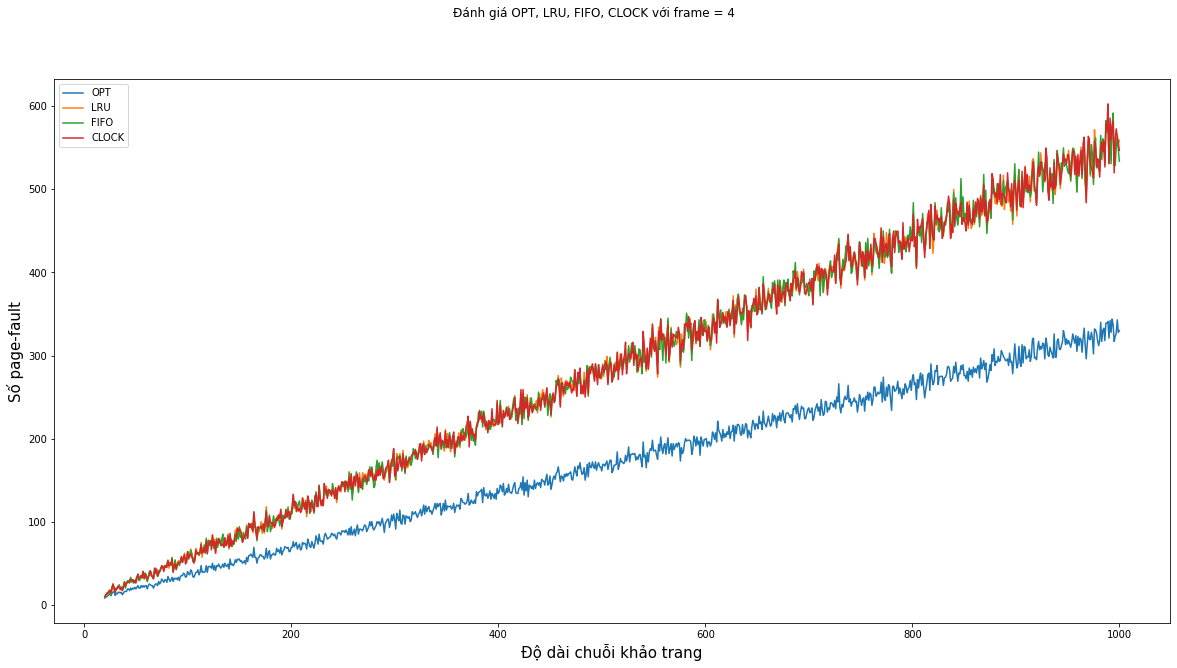

In [20]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá OPT, LRU, FIFO, CLOCK với frame = 4')
plt.plot(df)
plt.legend(label)
plt.ylabel('Số page-fault',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('f4.png')
plt.show()
# Như tittle

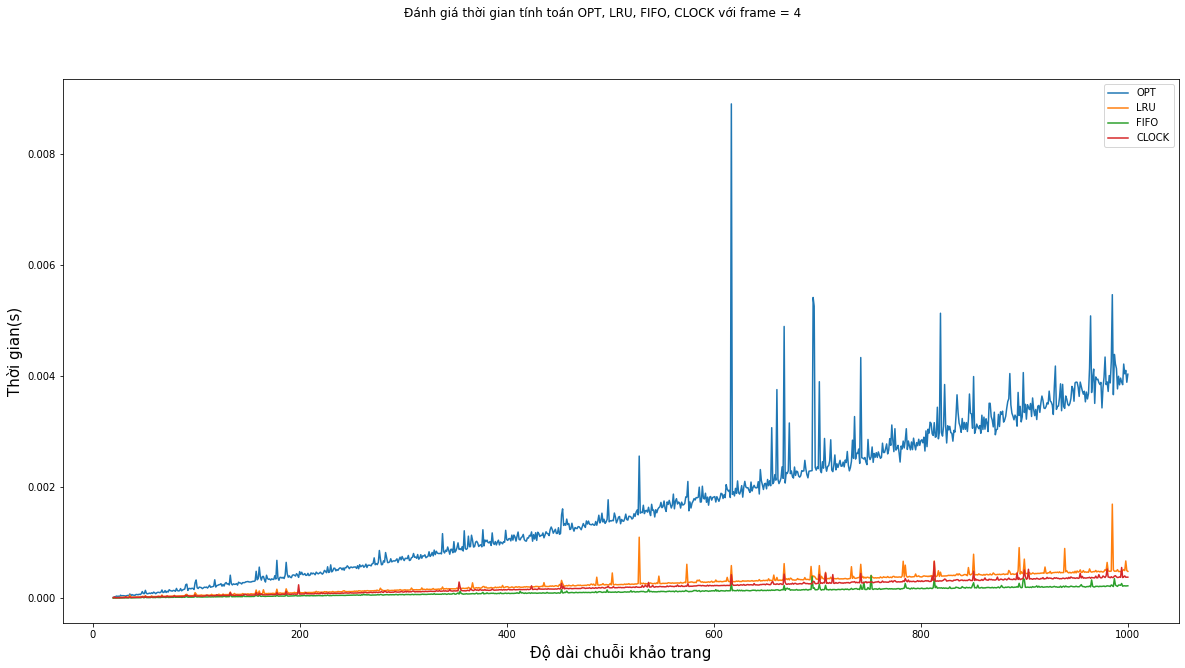

In [21]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán OPT, LRU, FIFO, CLOCK với frame = 4')
plt.plot(time)
plt.legend(label)
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('t4.png')
plt.show()
#Như tittle

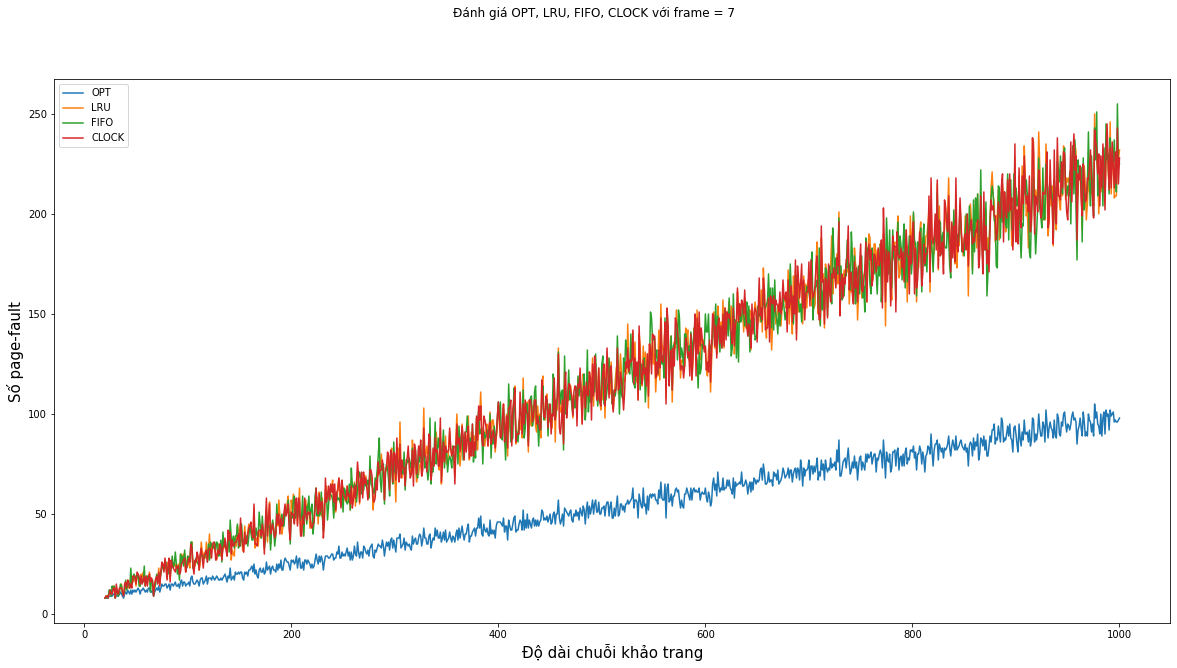

In [22]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá OPT, LRU, FIFO, CLOCK với frame = 7')
plt.plot(df1)
plt.legend(label)
plt.ylabel('Số page-fault',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('f7.png')
plt.show()
#Như tittle

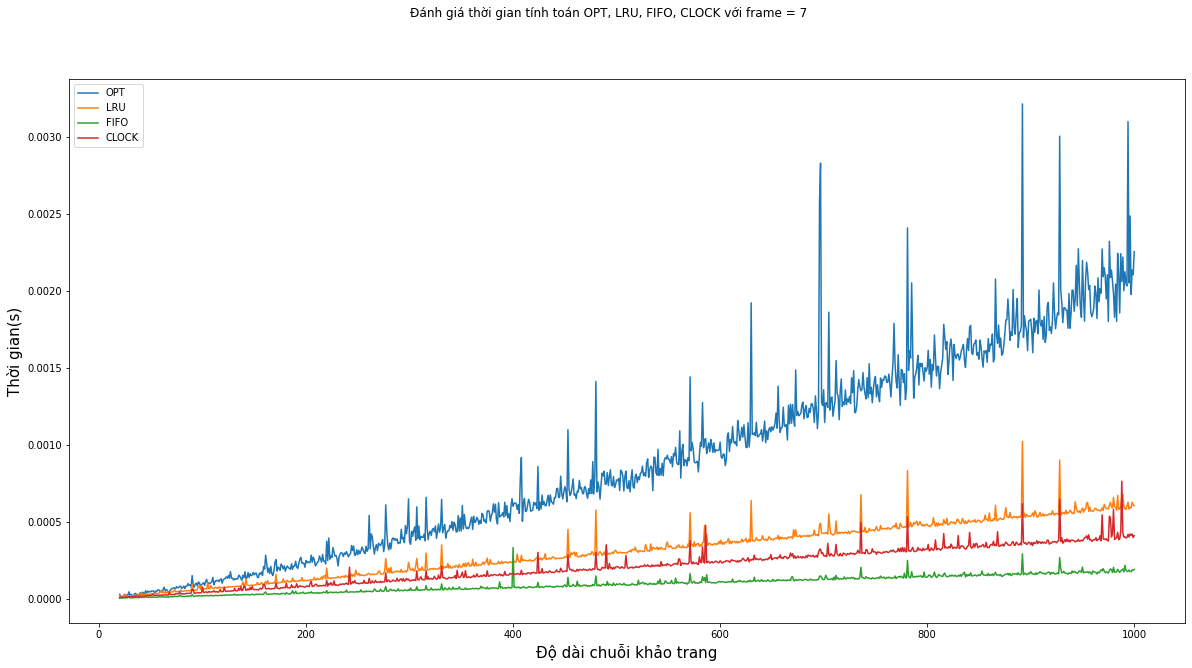

In [23]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán OPT, LRU, FIFO, CLOCK với frame = 7')
plt.plot(time1)
plt.legend(label)
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('t7.png')
plt.show()
#Như tittle

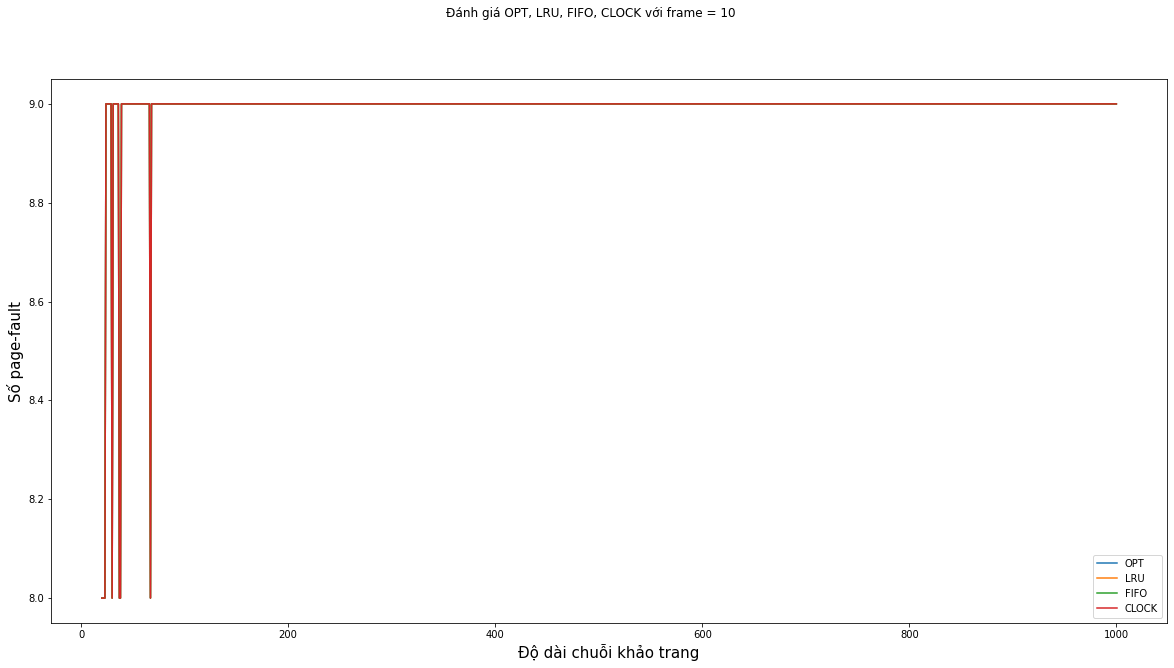

In [24]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá OPT, LRU, FIFO, CLOCK với frame = 10')
plt.plot(df2)
plt.legend(label)
plt.ylabel('Số page-fault',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('f10.png')
plt.show()
#Như tittle

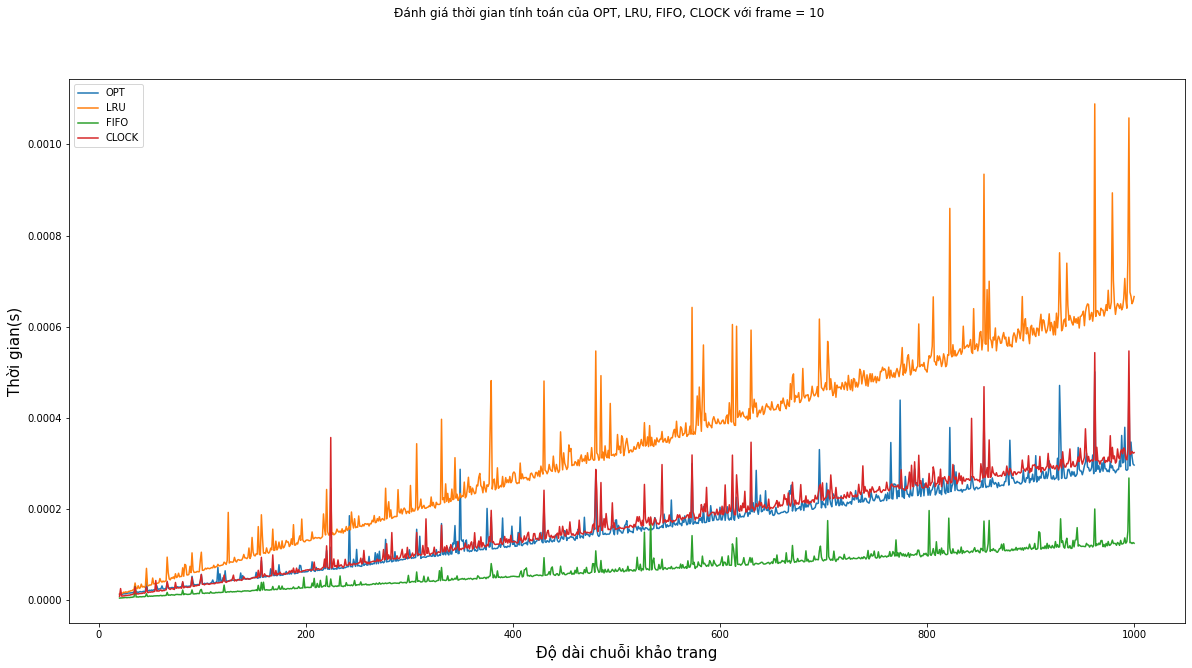

In [25]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán của OPT, LRU, FIFO, CLOCK với frame = 10')
plt.plot(time2)
plt.legend(label)
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('t10.png')
plt.show()
#Như tittle

In [26]:
#Data frame khi dùng opt
data_opt = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_opt['4 frame'] = time['opt']
data_opt['7 frame'] = time1['opt']
data_opt['10 frame'] = time2['opt']
data_opt

,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000018,0.000029,0.000012
21.0,0.000024,0.000014,0.000012
22.0,0.000028,0.000015,0.000013
23.0,0.000041,0.000014,0.000013
24.0,0.000035,0.000021,0.000014
...,...,...,...
996.0,0.004214,0.002488,0.000294
997.0,0.004038,0.001978,0.000347
998.0,0.004100,0.002136,0.000315


So sánh thời gian khi thay đổi frame thuật toán

Ta gộp các cột thời gian tính của thuật toán tương ứng có từ dataframe: time time2 time3 tạo thành dataframe thời gian tính OPT, LRU, FIFO, CLOCK

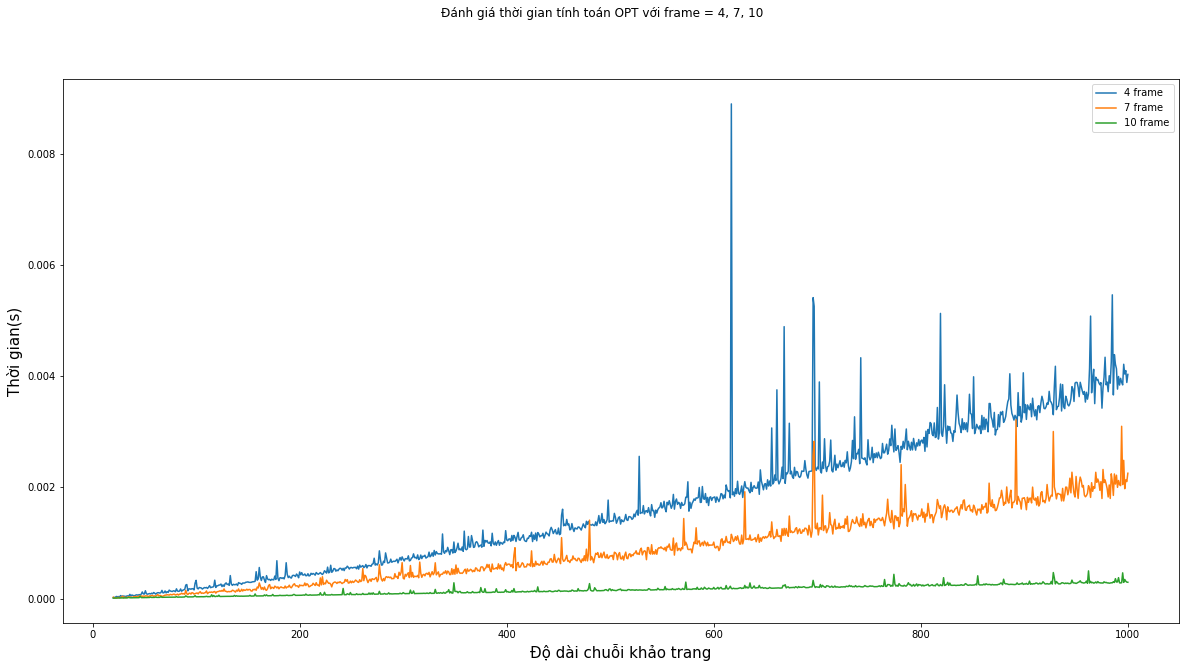

In [27]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán OPT với frame = 4, 7, 10')
plt.plot(data_opt)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('opt.png')
plt.show()
#Như title

In [28]:
#Data frame khi dùng LRU
data_lru = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_lru['4 frame'] = time['lru']
data_lru['7 frame'] = time1['lru']
data_lru['10 frame'] = time2['lru']
data_lru

,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000013,0.000014,0.000014
21.0,0.000013,0.000014,0.000014
22.0,0.000013,0.000015,0.000015
23.0,0.000014,0.000016,0.000015
24.0,0.000015,0.000023,0.000018
...,...,...,...
996.0,0.000517,0.000594,0.000676
997.0,0.000500,0.000591,0.000667
998.0,0.000672,0.000627,0.000650


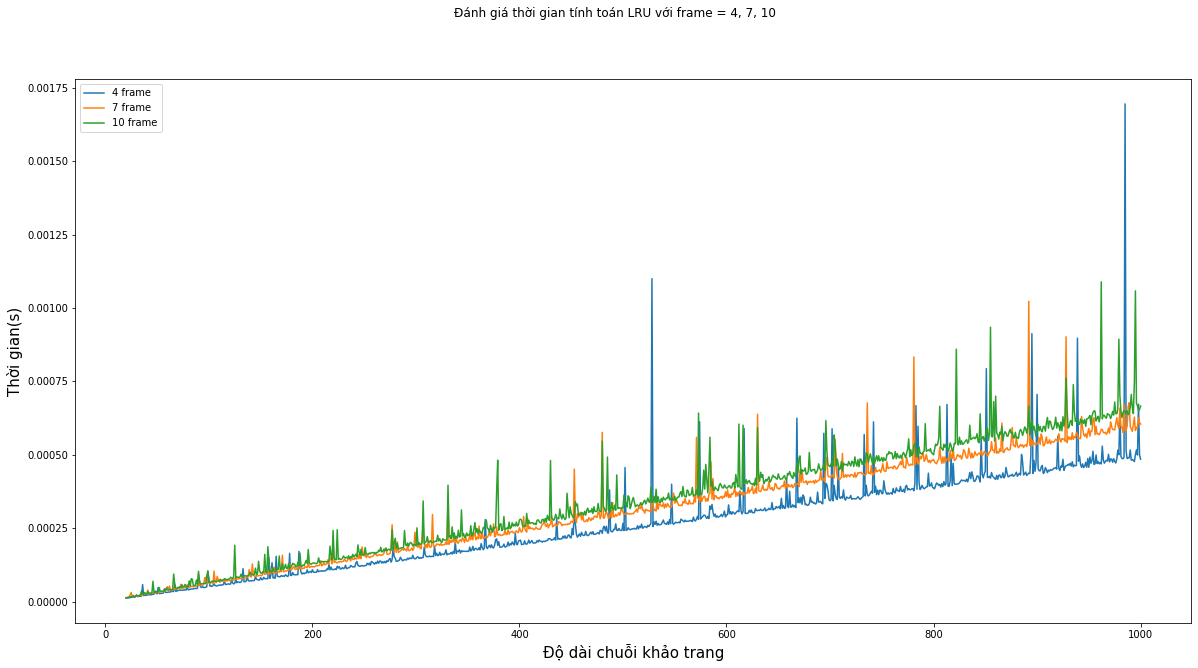

In [29]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán LRU với frame = 4, 7, 10')
plt.plot(data_lru)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('lru.png')
plt.show()
#Như title

In [30]:
#Data frame khi dùng FIFO
data_fifo = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_fifo['4 frame'] = time['fifo']
data_fifo['7 frame'] = time1['fifo']
data_fifo['10 frame'] = time2['fifo']
data_fifo

,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000005,0.000005,0.000005
21.0,0.000006,0.000005,0.000005
22.0,0.000006,0.000005,0.000005
23.0,0.000007,0.000006,0.000005
24.0,0.000006,0.000007,0.000005
...,...,...,...
996.0,0.000226,0.000177,0.000126
997.0,0.000226,0.000177,0.000127
998.0,0.000222,0.000188,0.000124


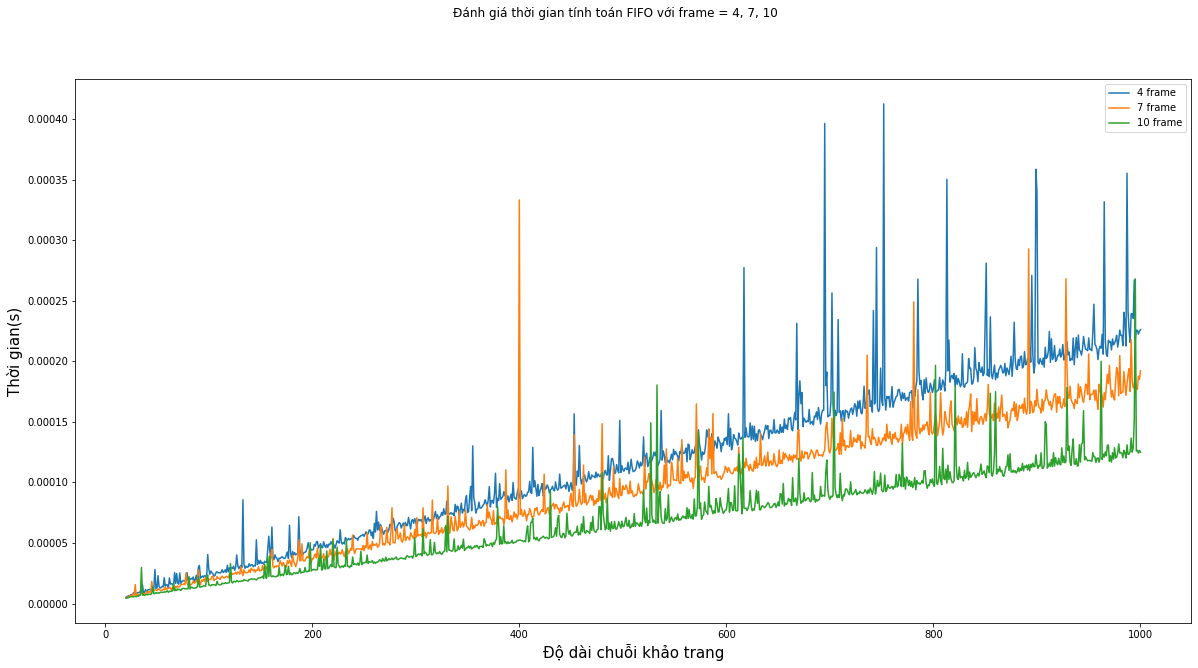

In [31]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán FIFO với frame = 4, 7, 10')
plt.plot(data_fifo)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('fifo.png')
plt.show()
#Như title

In [32]:
#Data frame khi dùng clock
data_clock = pd.DataFrame(columns=['4 frame', '7 frame', '10 frame'])
data_clock['4 frame'] = time['clock']
data_clock['7 frame'] = time1['clock']
data_clock['10 frame'] = time2['clock']
data_clock


,4 frame,7 frame,10 frame
lenght,,,
20.0,0.000009,0.000008,0.000008
21.0,0.000026,0.000009,0.000025
22.0,0.000010,0.000009,0.000009
23.0,0.000011,0.000011,0.000009
24.0,0.000011,0.000010,0.000009
...,...,...,...
996.0,0.000386,0.000422,0.000320
997.0,0.000403,0.000412,0.000321
998.0,0.000379,0.000421,0.000326


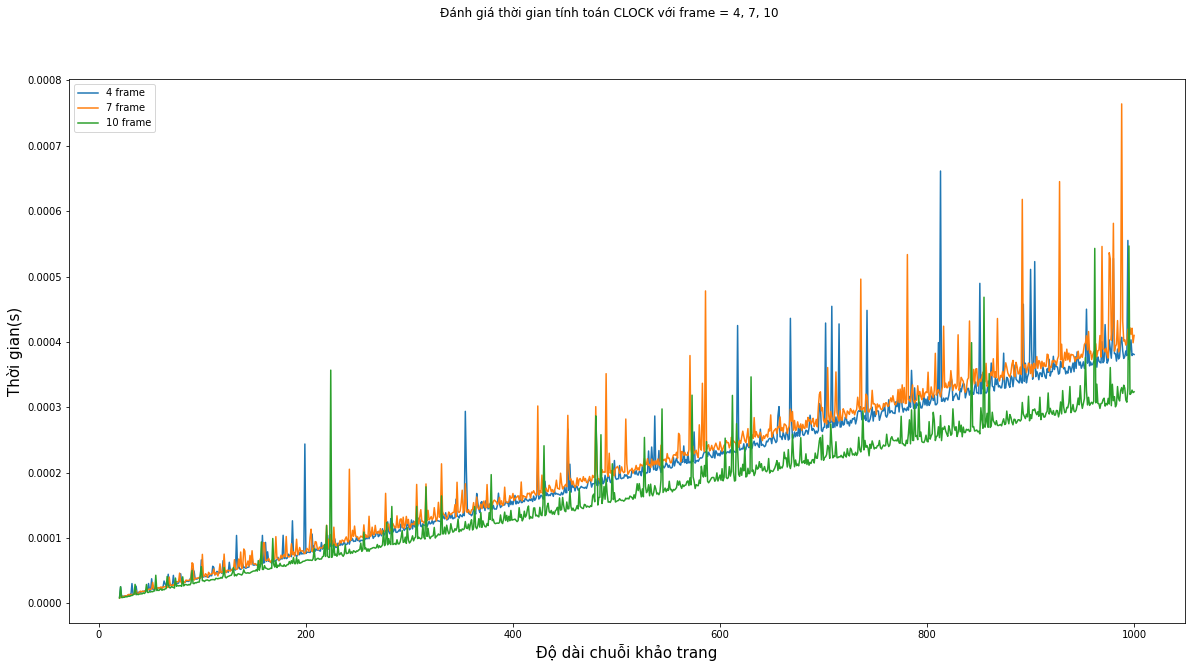

In [33]:
plt.figure(figsize=(20, 10))
plt.suptitle('Đánh giá thời gian tính toán CLOCK với frame = 4, 7, 10')
plt.plot(data_clock)
plt.legend(['4 frame', '7 frame', '10 frame'])
plt.ylabel('Thời gian(s)',fontsize=15)
plt.xlabel('Độ dài chuỗi khảo trang', fontsize=15)
plt.savefig('clock.png')
plt.show()
#Như title